<a href="https://colab.research.google.com/github/BautiSobenko/IA-2022/blob/main/Light_automation_Mamdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Declaracion de Universos de discurso

# luminance     = luz ambiental 
# changing_rate = tasa de cambio de la luz ambiental

luminance = ctrl.Antecedent(np.arange(0,301,1),"luminance")
changing_rate = ctrl.Antecedent(np.arange(-10,11,1),"changing_rate")
dimmer = ctrl.Consequent(np.arange(0,101,1),"dimmer")

In [ ]:
# Funciones de pertenencia de la luminancia

luminance["dark"] = fuzz.trapmf(luminance.universe, [0,0,30,90])
luminance["normal"] = fuzz.trapmf(luminance.universe, [30,90,210,270])
luminance["bright"] = fuzz.trapmf(luminance.universe, [210,270,300,300])

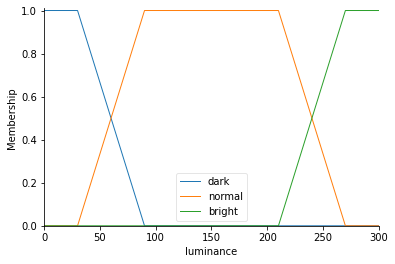

In [ ]:
luminance.view()

In [ ]:
# Funciones de pertenencia de la tasa de cambio
# NS = Negative Small
# ZE = Zero
# PS = Positive Small

changing_rate["NS"] = fuzz.trimf(changing_rate.universe, [-10,-10,0])
changing_rate["ZE"] = fuzz.trimf(changing_rate.universe, [-10,0,10])
changing_rate["PS"] = fuzz.trimf(changing_rate.universe, [0,10,10])

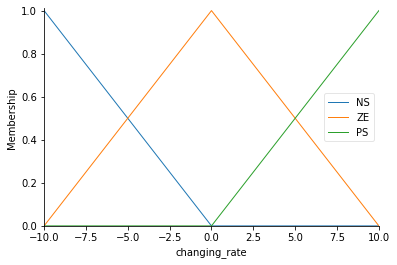

In [ ]:
changing_rate.view()

In [ ]:
#Funciones de pertenencia de la variable de salida, del dimmer
# VL = Very low
# L  = Low
# LH = Low High
# MH = Medium High
# H  = High
# VH = Very High

dimmer["VL"] = fuzz.trimf(dimmer.universe, [0,0,20])
dimmer["L"] = fuzz.trimf(dimmer.universe, [0,20,40])
dimmer["LH"] = fuzz.trimf(dimmer.universe, [20,40,60])
dimmer["MH"] = fuzz.trimf(dimmer.universe, [40,60,80])
dimmer["H"] = fuzz.trimf(dimmer.universe, [60,80,100])
dimmer["VH"] = fuzz.trimf(dimmer.universe, [80,100,100])

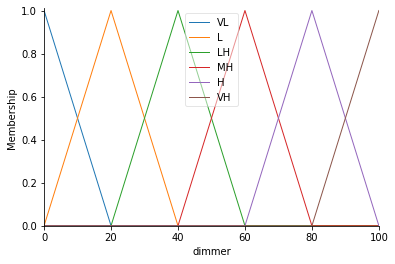

In [ ]:
dimmer.view()

In [ ]:
rule1 = ctrl.Rule(luminance["dark"] & changing_rate["PS"], dimmer["MH"] )
rule2 = ctrl.Rule(luminance["dark"] & changing_rate["ZE"], dimmer["H"] )
rule3 = ctrl.Rule(luminance["dark"] & changing_rate["NS"], dimmer["VH"] )

rule4 = ctrl.Rule(luminance["normal"] & changing_rate["PS"], dimmer["L"] )
rule5 = ctrl.Rule(luminance["normal"] & changing_rate["ZE"], dimmer["LH"] )
rule6 = ctrl.Rule(luminance["normal"] & changing_rate["NS"], dimmer["MH"] )

rule7 = ctrl.Rule(luminance["bright"] & changing_rate["PS"], dimmer["VL"] )
rule8 = ctrl.Rule(luminance["bright"] & changing_rate["ZE"], dimmer["L"] )
rule9 = ctrl.Rule(luminance["bright"] & changing_rate["NS"], dimmer["LH"] )

In [ ]:
# Se inicializa el sistema con el set de reglas

dimmer_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

In [ ]:
# Simulacion del FIS

dimmer_sim = ctrl.ControlSystemSimulation(dimmer_ctrl)

In [ ]:
# luminance     = [0,300]
# changing_rate = [-10,10]

inputs = {'luminance': 80, 
          'changing_rate': 5}

dimmer_sim.inputs(inputs)

In [ ]:
# Inferencia
# Agregacion
# Defuzzificacion
dimmer_sim.compute()

Output (dimmer) =  40.17831179715054 



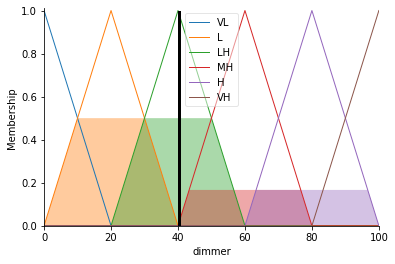

In [ ]:
print("Output (dimmer) = " , dimmer_sim.output["dimmer"],"\n")
dimmer.view(dimmer_sim)

In [ ]:
# Map a value to a fuzzy label
RESULT= dimmer_sim.output['dimmer']

print("VERY LOW: \t" + str(fuzz.interp_membership(dimmer.universe, dimmer['VL'].mf, RESULT)))
print("LOW: \t\t" + str(fuzz.interp_membership(dimmer.universe, dimmer['L'].mf, RESULT)))
print("SMALL HIGH: \t" + str(fuzz.interp_membership(dimmer.universe, dimmer['LH'].mf, RESULT)))
print("MEDIUM HIGH: \t" + str(fuzz.interp_membership(dimmer.universe, dimmer['MH'].mf, RESULT)))
print("HIGH: \t\t" + str(fuzz.interp_membership(dimmer.universe, dimmer['H'].mf, RESULT)))
print("VERY HIGH: \t" + str(fuzz.interp_membership(dimmer.universe, dimmer['VH'].mf, RESULT)))

VERY LOW: 	0.0
LOW: 		0.0
SMALL HIGH: 	0.991084410142473
MEDIUM HIGH: 	0.008915589857527096
HIGH: 		0.0
VERY HIGH: 	0.0
